# Practical 9: Dimensionality reduction

This week, we will focus on conducting dimensionality reduction on the
performance and disadvantage variables of schools in England, trying to
understand which variables (or variable combinations) are important in
distinguishing these schools.

We will use the method of principal component analysis (PCA).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Dataset

We’re going to use the filtered school data that has been used in
previous practicals.

In [2]:
# read in the dataset from Github
df_school = pd.read_csv("https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L6_data/Performancetables_130242/2022-2023/england_filtered.csv")

Check the shape and columns of this data frame.

In [3]:
print(f"df_school has {df_school.shape[0]} rows and {df_school.shape[1]} columns.")
print("First 5 rows:\n")
print(df_school.head(5))

df_school has 3056 rows and 37 columns.
First 5 rows:

      URN                                  SCHNAME.x  LEA  LANAME  TOWN.x  \
0  100053                     Acland Burghley School  202  Camden  London   
1  100054                The Camden School for Girls  202  Camden  London   
2  100052                           Hampstead School  202  Camden  London   
3  100049                          Haverstock School  202  Camden  London   
4  100059  La Sainte Union Catholic Secondary School  202  Camden  London   

  gor_name  TOTPUPS  ATT8SCR  ATT8SCRENG  ATT8SCRMAT  ATT8SCR_FSM6CLA1A  \
0   London   1163.0     50.3        10.7        10.2               34.8   
1   London   1047.0     65.8        13.5        12.7               54.7   
2   London   1319.0     44.6         9.7         9.1               39.3   
3   London    982.0     41.7         8.7         8.8               37.7   
4   London    817.0     49.6        10.8         9.4               45.9   

   ATT8SCR_NFSM6CLA1A  ATT8SCR_

The metadata of this data is available
[here](https://github.com/huanfachen/QM/blob/main/sessions/L6_data/Performancetables_130249/2022-2023/census_meta.csv).
For convenience, the columns are described as below:  
1. **URN**: Unique Reference Number identifying a school.  
2. **SCHNAME.x**: School name as recorded in the official register.  
3. **LEA**: Local Education Authority (code).  
4. **LANAME**: Name of the Local Authority.  
5. **TOWN.x**: Town in which the school is located.  
6. **gor_name**: Government Office Region name.  
7. **TOTPUPS**: Total number of pupils on roll.  
8. **ATT8SCR**: Average Attainment 8 score for all pupils.  
9. **ATT8SCRENG**: Average Attainment 8 score for English subject
grouping.  
10. **ATT8SCRMAT**: Average Attainment 8 score for Maths subject
grouping.  
11. **ATT8SCR_FSM6CLA1A**: Average Attainment 8 score for pupils
eligible for Free School Meals in the last 6 years and/or Children
Looked After.  
12. **ATT8SCR_NFSM6CLA1A**: Average Attainment 8 score for pupils not
eligible for Free School Meals in the last 6 years and not Children
Looked After.  
13. **ATT8SCR_BOYS**: Average Attainment 8 score for male pupils.  
14. **ATT8SCR_GIRLS**: Average Attainment 8 score for female pupils.  
15. **P8MEA**: Progress 8 measure for all pupils.  
16. **P8MEA_FSM6CLA1A**: Progress 8 measure for disadvantaged pupils
(FSM6 and/or CLA1A).  
17. **P8MEA_NFSM6CLA1A**: Progress 8 measure for non-disadvantaged
pupils.  
18. **PTFSM6CLA1A**: Percentage of pupils eligible for FSM6 and/or
CLA1A.  
19. **PTNOTFSM6CLA1A**: Percentage of pupils not eligible for FSM6
and/or CLA1A.  
20. **PNUMEAL**: Percentage of pupils whose first language is known or
believed to be other than English.  
21. **PNUMENGFL**: Percentage of pupils whose first language is
English.  
22. **PTPRIORLO**: Percentage of pupils with low prior attainment from
Key Stage 2.  
23. **PTPRIORHI**: Percentage of pupils with high prior attainment from
Key Stage 2.  
24. **NORB**: Number of boys on roll.  
25. **NORG**: Number of girls on roll.  
26. **PNUMFSMEVER**: Percentage of pupils who have been eligible for
free school meals in the past six years (FSM6 measure).  
27. **PERCTOT**: Percentage of total pupil absence (authorised and
unauthorised combined).  
28. **PPERSABS10**: Percentage of pupils who are persistently absent
(overall absence rate 10% or more).  
29. **SCHOOLTYPE.x**: Official classification of the school type (e.g.,
Academy, Community, Voluntary Aided).  
30. **RELCHAR**: Religious character of the school (e.g., Church of
England, Roman Catholic, None).  
31. **ADMPOL.y**: Admission policy type (e.g., non-selective,
selective).  
32. **ADMPOL_PT**: Percentage breakdown related to admission policy
(context-specific).  
33. **gender_name**: Gender intake of the school (Mixed, Boys, Girls).  
34. **OFSTEDRATING**: Latest Ofsted inspection overall effectiveness
grade.  
35. **MINORGROUP**: Ethnic minority group classification for aggregation
purposes.  
36. **easting**: Ordnance Survey Easting coordinate of school
location.  
37. **northing**: Ordnance Survey Northing coordinate of school
location.

As the focus is to explore the performance and disadvantage ratio of
schools, we will keep the following variables:

1.  **PTFSM6CLA1A** – Percentage of pupils eligible for Free School
    Meals in the past six years (FSM6) and/or Children Looked After
    (CLA1A).  
2.  **PTNOTFSM6CLA1A** – Percentage of pupils not eligible for FSM6 and
    not CLA1A.  
3.  **PNUMEAL** – Percentage of pupils whose first language is known or
    believed to be other than English.  
4.  **PNUMFSMEVER** – Percentage of pupils who have ever been eligible
    for Free School Meals in the past six years (FSM6 measure).  
5.  **ATT8SCR_FSM6CLA1A** – Average Attainment 8 score for pupils
    eligible for FSM6 and/or CLA1A.  
6.  **ATT8SCR_NFSM6CLA1A** – Average Attainment 8 score for pupils not
    eligible for FSM6 and not CLA1A.  
7.  **ATT8SCR_BOYS** – Average Attainment 8 score for male pupils.  
8.  **ATT8SCR_GIRLS** – Average Attainment 8 score for female pupils.  
9.  **P8MEA_FSM6CLA1A** – Progress 8 measure for disadvantaged pupils
    (FSM6 and/or CLA1A).  
10. **P8MEA_NFSM6CLA1A** – Progress 8 measure for non-disadvantaged
    pupils.

Please note - we remove the count variables (e.g. NORB and NORG), as the
count variables are affected by the pupil size of each school. We also
remove variables that are redundant due to perfect correlation with
those retained, such as PNUMENGFL, which is equal to 1-PNUMEAL.

In [4]:
# Extract the selected columns
df_school_reduced = df_school[
    [
        'PTFSM6CLA1A', 'PTNOTFSM6CLA1A', 'PNUMEAL', 'PNUMFSMEVER', 
        'ATT8SCR_FSM6CLA1A', 'ATT8SCR_NFSM6CLA1A', 'ATT8SCR_BOYS', 'ATT8SCR_GIRLS', 
        'P8MEA_FSM6CLA1A', 'P8MEA_NFSM6CLA1A'       
    ]
]

# Display the first few rows
print(df_school_reduced.head())

   PTFSM6CLA1A  PTNOTFSM6CLA1A  PNUMEAL  PNUMFSMEVER  ATT8SCR_FSM6CLA1A  \
0         37.0            63.0     23.6         39.6               34.8   
1         36.0            64.0     25.5         30.3               54.7   
2         45.0            55.0     38.1         51.3               39.3   
3         63.0            37.0     57.5         69.8               37.7   
4         41.0            59.0     50.6         42.7               45.9   

   ATT8SCR_NFSM6CLA1A  ATT8SCR_BOYS  ATT8SCR_GIRLS  P8MEA_FSM6CLA1A  \
0                59.2          51.5           46.8            -0.99   
1                72.0           NaN           65.8             0.25   
2                49.0          41.9           47.1            -0.18   
3                48.5          40.1           43.7            -0.44   
4                52.2           NaN           49.6            -0.20   

   P8MEA_NFSM6CLA1A  
0              0.34  
1              1.13  
2              0.09  
3              0.02  
4           

## Task one: to address missing values and to standardise variables

We expect that all variabels in df_school_reduced are of numerical type.
It is safe to check it before further analysis.

In [5]:
print("Numeric columns: {}".format(df_school_reduced.select_dtypes(include='number').columns.tolist()))
print("Non-numeric columns: {}".format(df_school_reduced.select_dtypes(exclude='number').columns.tolist()))

Numeric columns: ['PTFSM6CLA1A', 'PTNOTFSM6CLA1A', 'PNUMEAL', 'PNUMFSMEVER', 'ATT8SCR_FSM6CLA1A', 'ATT8SCR_NFSM6CLA1A', 'ATT8SCR_BOYS', 'ATT8SCR_GIRLS', 'P8MEA_FSM6CLA1A', 'P8MEA_NFSM6CLA1A']
Non-numeric columns: []

To convert all columns to numeric, we can use the following code. Note
that numeric columns are not affected.

In [6]:
df_school_reduced = df_school_reduced.apply(pd.to_numeric, errors='coerce')

Now, let’s check whether our dataset has any missing values — this is
important because PCA in sklearn package cannot handle `NaN` values
directly.

To display the number of missing entries for each column:

In [7]:
# Check missing values column by column
missing_counts = df_school_reduced.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 PTFSM6CLA1A            86
PTNOTFSM6CLA1A         86
PNUMEAL                25
PNUMFSMEVER            25
ATT8SCR_FSM6CLA1A     128
ATT8SCR_NFSM6CLA1A    126
ATT8SCR_BOYS          294
ATT8SCR_GIRLS         244
P8MEA_FSM6CLA1A       138
P8MEA_NFSM6CLA1A      131
dtype: int64

> **Note**
>
> There are two common ways to deal with missing values:
>
> 1.  Remove all rows with at least one missing values. In this dataset,
>     this leads to loss of many rows (around 10%).
> 2.  Impute the missing values using a selected imputation method.

To fill in these missing values, we will use the KNNImputer() from
sklearn.impute.

This method finds the k closest rows (neighbors) to the one with the
missing value and uses their values to compute an average for
imputation.

It’s a smarter approach than simply filling with the mean or median
because it considers patterns across all variables.

In [8]:
from sklearn.impute import KNNImputer

# Create our KNN imputer (k=5 is a common choice, but can be tuned)
imputer = KNNImputer(n_neighbors=5)

# Fit to our data and transform it
df_school_reduced = pd.DataFrame(
    imputer.fit_transform(df_school_reduced),
    columns=df_school_reduced.columns,  # Keep original column names
    index=df_school_reduced.index       # Keep original index
)

# Double-check that there are no more missing values
print("Are there any missing values left?:", df_school_reduced.isnull().sum().sum() == 0)

Are there any missing values left?: True

Then, we will compare all variables in terms of their range, mean, and
variance.

In [9]:
df_school_reduced.describe()

The results show that most variables (except two Progress 8 variables)
are on a scale of 0-100, while the Progress 8 variables are between -3
and 3.

Recall the definition of Progress 8: it measures the academic progress
pupils make between the end of primary school (Key Stage 2) and the end
of secondary school (Key stage 4) compared to other pupils nationally
with similar starting points. In practice, this values often lie between
-2.0 (very low progress) and +2.0 (exceptional progress).

Therefore, we need to normalise these variables so that they are
comparable before conducting PCA. Here, we will use the StandardScaler
from sklearn package. According to [the
documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html),
it standises each feature by removing the mean and scaling to unit
variance, which is also called z-score standardisation.

z = (x - u) / s

Please note: using StandardScaler().fit_transform() on a DataFrame will
output a numpy array, which differs from DataFrame and has no column
names. If we would like to maintain a dataframe format, the numpy array
should be wrapped back to DataFrame.

In [10]:
# standardisation of df_school_reduced. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
np_scaled = StandardScaler().fit_transform(df_school_reduced)

# Fit and transform, then wrap back to DataFrame
df_school_reduced = pd.DataFrame(
    np_scaled,
    columns=df_school_reduced.columns,   # preserve column names
    index=df_school_reduced.index        # preserve row labels
)

We can double check the scale of variables after the standardisation.

In [11]:
df_school_reduced.describe()
df_school_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PTFSM6CLA1A         3056 non-null   float64
 1   PTNOTFSM6CLA1A      3056 non-null   float64
 2   PNUMEAL             3056 non-null   float64
 3   PNUMFSMEVER         3056 non-null   float64
 4   ATT8SCR_FSM6CLA1A   3056 non-null   float64
 5   ATT8SCR_NFSM6CLA1A  3056 non-null   float64
 6   ATT8SCR_BOYS        3056 non-null   float64
 7   ATT8SCR_GIRLS       3056 non-null   float64
 8   P8MEA_FSM6CLA1A     3056 non-null   float64
 9   P8MEA_NFSM6CLA1A    3056 non-null   float64
dtypes: float64(10)
memory usage: 238.9 KB

After the standardisation, all variables have zero mean and unit
variance (close to 1) so that they are comparable.

## Task two: to conduct PCA

We will use the following code to conduct PCA. First, a PCA object is
created using `PCA()`. Then, this object is applied to fit and transform
df_school_reduced.

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
# fit the components
pca_np_school_reduced = pca.fit_transform(df_school_reduced)
# type of output
print("Type of PCA output:{}".format(pca_np_school_reduced.__class__))

Type of PCA output:<class 'numpy.ndarray'>

`pca` stores the relationship between the original and new variables,
while `pca_np_school_reduced` is a numpy array that stores the new
coordinates under the new variables for each school.

How many new variables (or Principle Components) have been generated?

In [13]:
print("Number of PCs: {}".format(pca_np_school_reduced.shape[1]))

Number of PCs: 10

What are the importance of each PC? In other words, to what extent does
each PC explain the variance of performance and disadvantage of schools?

In [14]:
print('Explained variance ratio of each PC:')
print(pca.explained_variance_ratio_.round(3))
# the sum of explained variance should be equal to 1.0 or 100%
print('Sum of explained variance ratio of all PCs：{}'.format(pca.explained_variance_ratio_.sum())) 

Explained variance ratio of each PC:
[0.61  0.255 0.053 0.038 0.028 0.007 0.005 0.005 0.001 0.   ]
Sum of explained variance ratio of all PCs：1.0000000000000002

The first PC (which is also the most important PC) accounts for 61.0% of
the variance of the original dataset, while the second and third PC
accounts for 25.4% and 5.25%, respectively. In total, the top two PCs
accounts for 86.4% of the variance between schools.

To check the relationship between the original and new variables:

In [15]:
df_PC = pd.DataFrame(pca.components_, columns = df_school_reduced.columns.to_list()) # the list_var_X is used as the column names
df_PC

To interpret, the first row represents how the first PC is generated
from a linear combination of the original variables:

-   Some variables have a negative coefficient, such as PTFSM6CLA1A and
    PNUMFSMEVER.
-   The ATT8SCR_GIRLS variable contributes to the PC1 more than the
    other variables. *Can you explain this?*

We can choose the number of PCs using a Scree plot and elbow method,
which is based on variance explained of each PC.

Table of explained variance
   n_pc  explained_var  cum_var
0     1          0.610    0.610
1     2          0.255    0.865
2     3          0.053    0.918
3     4          0.038    0.955
4     5          0.028    0.983
5     6          0.007    0.990
6     7          0.005    0.994
7     8          0.005    0.999
8     9          0.001    1.000
9    10          0.000    1.000

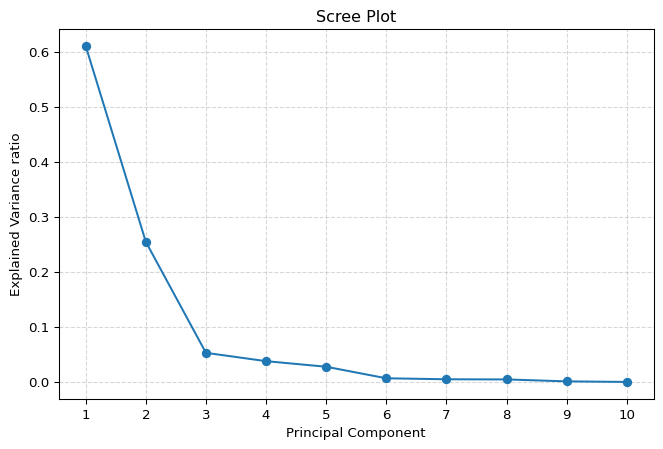

Chosen k based on turning-point elbow detection: 3

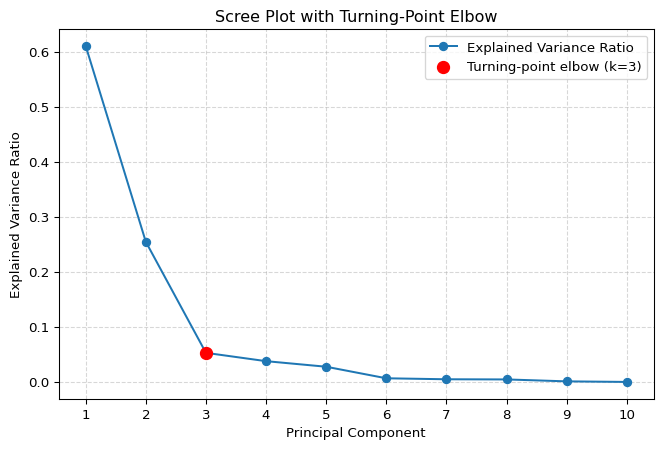

In [16]:
# Explained variance ratio
explained_var = pca.explained_variance_ratio_
num_components = len(explained_var)

# print explained_var and accumulative explained variance
df_explained_var = pd.DataFrame({
    "n_pc": np.arange(1, len(explained_var) + 1),
    "explained_var": explained_var,
    "cum_var": np.cumsum(explained_var)
})

print("Table of explained variance")
print(df_explained_var.round(3))

# Scree plot (Explained variance ratio)
plt.figure(figsize=(8, 5))
pcs = np.arange(1, num_components + 1)
plt.plot(pcs, explained_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance ratio")
plt.xticks(pcs)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Elbow detection using "turning point" (discrete second derivative)

y = explained_var

# Need at least 3 points to compute a second derivative
if num_components < 3:
    # Fallback: choose 1 component if fewer than 3 PCs
    k = 1
else:
    # First differences: dy[i] = y[i+1] - y[i]
    dy = np.diff(y)                  # length: num_components - 1

    # Second differences: ddy[i] = dy[i+1] - dy[i]
    ddy = np.diff(dy)                # length: num_components - 2

    # Index of max absolute curvature (turning point)
    # ddy[i] is curvature at original index i+1 (0-based)
    turning_idx = np.argmax(np.abs(ddy))  # in range [0, num_components-3]

    # Convert to PC index (1-based for plotting/human interpretation)
    k = turning_idx + 2  # +1 for 0-based -> original index, +1 more because curvature is at i+1

print(f"Chosen k based on turning-point elbow detection: {k}")

# visualise elbow on Scree plot
plt.figure(figsize=(8, 5))
plt.plot(pcs, explained_var, marker='o', label="Explained Variance Ratio")
plt.scatter(k, explained_var[k-1], color='red', s=80, zorder=5,
            label=f"Turning-point elbow (k={k})")
plt.title("Scree Plot with Turning-Point Elbow")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(pcs)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

The Scree plot and Elbow method suggested using k=3 PCs for further
analysis.

## Task three: to validate and visualise the selected PCs

How do school look like and distribute in the top two PCs? To visualise
them, we can use the following code and two PCs.

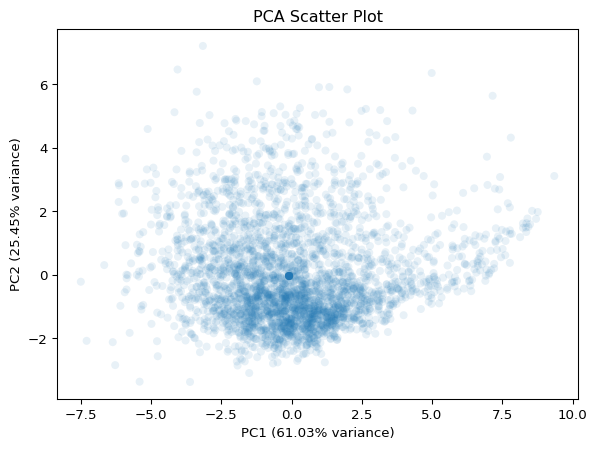

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(pca_np_school_reduced[:, 0], 
pca_np_school_reduced[:, 1], 
alpha=0.1,              
edgecolor='none')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Scatter Plot")
plt.show()

> **Note**
>
> If you would like to reduce the overlap between dots, you can try
> lowering the `alpha` parameter of `plt.scatter()`. The lower alpha,
> the more transparent.

This plot doesn’t tell much. We can include additional variable to this
plot, such as the overall attainment 8 score for all pupils. This would
reveal how the overall attainment looks like in this new feature space.

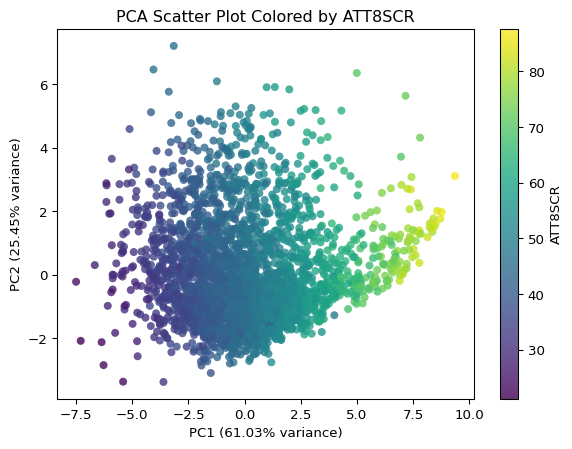

In [18]:
# Create DataFrame from PCA output
df_pca_school_reduced = pd.DataFrame(
    pca_np_school_reduced,
    columns=[f"PC{i}" for i in range(1, pca_np_school_reduced.shape[1]+1)] #PC1, PC2, ...
)

# Append ATT8SCR column from df_school (same row order)
df_pca_school_reduced = df_pca_school_reduced.assign(ATT8SCR = df_school.ATT8SCR)

# Plot scatter using viridis colormap
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    df_pca_school_reduced['PC1'],
    df_pca_school_reduced['PC2'],
    c=df_pca_school_reduced['ATT8SCR'],
    cmap='viridis',
    alpha=0.8,       # transparency for better visibility
    edgecolor='none'
)

# Labels and title
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Scatter Plot Colored by ATT8SCR")

# Colorbar
plt.colorbar(scatter, label='ATT8SCR')

plt.show()

While the code above is equivalent to the code in the next cell, the
code in the next cell is more concise and elegant.

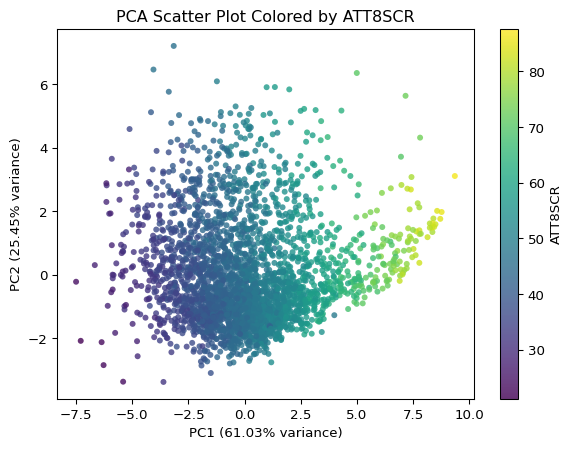

In [19]:
# Create DataFrame from PCA output and append ATT8SCR
df_pca_school_reduced = pd.DataFrame(
    pca_np_school_reduced,
    columns=[f"PC{i}" for i in range(1, pca_np_school_reduced.shape[1] + 1)]
).assign(ATT8SCR=df_school['ATT8SCR'])

# Plot using DataFrame's plot.scatter
ax = df_pca_school_reduced.plot.scatter(
    x='PC1',
    y='PC2',
    c='ATT8SCR',
    alpha=0.8,
    figsize=(7, 5),
    edgecolor='none'
)

# Add labels and title
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
ax.set_title("PCA Scatter Plot Colored by ATT8SCR")

plt.show()

This plot shows that PC1 is higher correlated with the overall
Attainment 8 score.

How about visualising **absence** in this new feature space?

#### Question

In [ ]:
# Append PERCTOT column from df_school
df_pca_school_reduced = ???.???(PERCTOT = df_school.???)

# Plot using DataFrame's plot.scatter
ax = df_pca_school_reduced.plot.scatter(
    x='??',
    y='??',
    c='??',
    alpha=0.8,
    figsize=(7, 5),
    edgecolor='none'
)

# Add labels and title
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
ax.set_title("PCA Scatter Plot Colored by PERCTOT")

plt.show()

## You’re Done!

Congratulations on completing the practical on dimensionality reduction.

It takes time to learn - remember practice makes perfect!

If you have time, please think about applying this technique to other
variables in the school data, or your own datasets.